In [1]:
cd Desktop

C:\Users\Ayman\Desktop


In [2]:
import matplotlib.pyplot as plt
import gzip
import numpy as np

In [17]:

f = gzip.open('./train/train-images-idx3-ubyte.gz','r')
g=gzip.open('./train/train-labels-idx1-ubyte.gz','r')
image_size = 28 
num_images = 100 #taking 5000 images from the ds

import numpy as np
f.read(100)
g.read(8)
buf = f.read(image_size * image_size * num_images)
buf2=g.read(num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)
labels=np.frombuffer(buf2, dtype=np.uint8)

(100, 28, 28, 1)
3


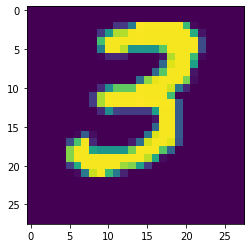

In [24]:
print(data.shape)
image = np.asarray(data[7]).squeeze()
print(labels[7])
plt.imshow(image)
plt.show()

In [16]:
data=data.reshape(5000,28*28) #reshaping the data so we can cluster easily

In [479]:
data.shape

(5000, 784)

In [480]:
data=data/255. #data normalization

In [260]:
k=5 #start with 5 clusters
centroids=[]
clusters={}
for i in range(k):
    centroids.append(np.random.rand(784,1))
    clusters[str(i)]=np.zeros((784,1))

In [205]:
data=np.array(data)
a=data[0].reshape(784,1)

In [206]:
clusters['0']=np.append(clusters['0'],a,axis=1)

In [207]:
clusters['0'].shape


(784, 2)

In [3]:
def distortion_measure(clusters,centroids):
    mse=0
    for i in range(len(centroids)):
        mse+=np.sum(np.square(clusters[str(i)][:-1,:]-centroids[i]))
    return mse

In [4]:
def load_data(num_images=5000): #read the data from the dataset and returns the array of data and an array of labels
    f = gzip.open('./train/train-images-idx3-ubyte.gz','r')
    g=gzip.open('./train/train-labels-idx1-ubyte.gz','r')
    image_size = 28 
    f.read(100)
    g.read(8)
    buf = f.read(image_size * image_size * num_images)
    buf2 = g.read(num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size*image_size)
    data = data/255.
    labels=np.frombuffer(buf2, dtype=np.uint8)
    return data,labels 

In [5]:
def initialize_centroids(k,data):
    centroids=[]
    for i in range(k):
        centroids.append(data[np.random.randint(0,data.shape[0]),:-1])
        centroids[i]=centroids[i].reshape((784,1)) #initialize the centroids random examples inside the data set
    return centroids

In [6]:
def initialize_clusters(k):
    clusters={}
    for i in range(k):
        clusters[str(i)]=np.zeros((785,1))#initialize the clusters with an empty vector so we can append on it
    return clusters

In [7]:
def cluster(data,k=10): #K-Means clustering using a default k value =10
    changed=True #flag that marks when the centroids change, (centroids-mean =0)
    it=0
    distortion_array=[] #to append distortions so we can plot
    accuracy_array=[] #to append accuracies so we can plot
    centroids=initialize_centroids(k,data) #initializing centroids
    
    while(changed): 
        clusters=initialize_clusters(k)
        print("Iteration: "+str(it)) #print iteration number in each iteration
        it+=1
        changed=False
        for i in range (data.shape[0]):
            minimum=100000
            index=0
            data_numpy=data[i].reshape(785,1) #reshaping the data from (785,) to (785,1) a type 1 array
            for j in range(k):
                temp=abs(np.linalg.norm(data_numpy[:-1,:]-centroids[j])) #we ignore the data_numpy[785,1] because it is reserved for the label
                if temp<minimum: #get the minimum distance's index to append on it
                    index=j
                    minimum=temp
            clusters[str(index)]=np.append(clusters[str(index)],data_numpy,axis=1) 
        mean=[]
        for i in range(k):
            curr_mean=np.mean(clusters[str(i)][:-1,:],axis=1) #get the mean so we can compare it to the centroid
            curr_mean=curr_mean.reshape((784,1))          
            if sum(abs(centroids[i]-curr_mean))>0.0001: #tolerance because it can exist numerical error
                centroids[i]=curr_mean
                changed=True
            mean.append(curr_mean) #mean array so we can plot the mean images
        distortion_var=distortion_measure(clusters,centroids)
        distortion_array.append(distortion_var)
        accuracy_var=compute_accuracy(clusters,k)
        accuracy_array.append(accuracy_var)
        print("Distortion: "+str(distortion_var)) #print the distortion in each iteration
        print("Accuracy: "+str(accuracy_var))  #print the accuracy in each iteration
    return clusters,centroids,distortion_array,mean,accuracy_array
            

In [8]:
def compute_accuracy(clusters,k):
    labels=[]
    accuracy=0
    for i in range(k):
        labels.append(clusters[str(i)][-1,1:]) #get all labels
    for label in labels:
        accuracies=[]
        accuracies.append(0)
        if len(label)>0:
            for i in range(k):
                accuracies.append((sum(label==i))/len(label))
        accuracy+=max(accuracies) # get the maximum accuracy, which represent the label of the cluster and add it to the accuracy sum
    return accuracy/k #return average accuracy

In [46]:
k=10
num_images=5000 #taking 5000 samples from the dataset (there exist 60000 samples but it takes forever to train)
data,labels=load_data(num_images)
labels=labels.reshape((num_images,1))
data=np.concatenate((data,labels),axis=1)
clusters,centroids,distortion_array,mean,accuracy_array=cluster(data,k)


Iteration: 0
Distortion: 213345.51618727398
Accuracy: 0.49338227987788824
Iteration: 1
Distortion: 202826.22625328813
Accuracy: 0.5282972042661818
Iteration: 2
Distortion: 199773.56270199528
Accuracy: 0.5412780062505381
Iteration: 3
Distortion: 198548.64413415297
Accuracy: 0.5461244003543302
Iteration: 4
Distortion: 197862.06680225465
Accuracy: 0.5531161586861105
Iteration: 5
Distortion: 197445.77388734953
Accuracy: 0.558223000175332
Iteration: 6
Distortion: 197188.57181137084
Accuracy: 0.560300809089254
Iteration: 7
Distortion: 196964.12477876333
Accuracy: 0.5641155399066227
Iteration: 8
Distortion: 196752.510808789
Accuracy: 0.5647186126211353
Iteration: 9
Distortion: 196561.2572422764
Accuracy: 0.5671017840275566
Iteration: 10
Distortion: 196371.2732866929
Accuracy: 0.5696907619854807
Iteration: 11
Distortion: 196224.37858809257
Accuracy: 0.5740994491965925
Iteration: 12
Distortion: 196073.85718573583
Accuracy: 0.5754722111167635
Iteration: 13
Distortion: 195906.57631652412
Accuracy

In [47]:
x=range(72)

<function matplotlib.pyplot.show(*args, **kw)>

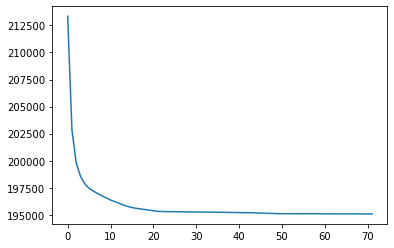

In [49]:
plt.plot(x,distortion_array)
plt.show

0.40784313725490196


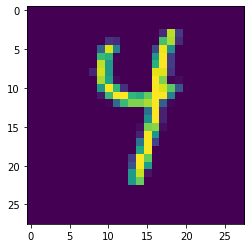

In [94]:
label=clusters['2'][-1,:]
repre=clusters['2'][:-1,2].reshape(1,28,28,1)
mean_img=mean[0].reshape(28,28,1)
label_bool=(label==4.0)
print(sum(label_bool)/(len(label_bool)-1))
#print(label_bool)
image = np.asarray(repre.squeeze())
plt.imshow(image)
plt.show()

In [96]:
data[0].shape

(785,)

In [95]:
data.shape[0]

5000